## Pixel Size

In [1]:
import tensorflow as tf
import numpy as np
import cv2 
from skimage import exposure

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
__________

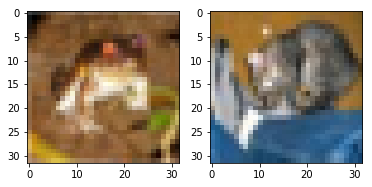

In [2]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
%matplotlib inline

_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32,32, 3));
ax2.imshow(X_val[0].reshape(32, 32, 3));

model32 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

model32.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model32.summary()

In [18]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))
    hist32 = model32.fit(X_train, y_train,
          batch_size=64,
          epochs=25,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=[early_stop, tensorboard])
va32 = hist32.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 35s 708us/step - loss: 1.7991 - acc: 0.3245 - val_loss: 1.9354 - val_acc: 0.3050
Epoch 2/25
50000/50000 [==============================] - 38s 754us/step - loss: 1.3778 - acc: 0.4867 - val_loss: 1.6629 - val_acc: 0.3984
Epoch 3/25
50000/50000 [==============================] - 37s 737us/step - loss: 1.1864 - acc: 0.5709 - val_loss: 1.5826 - val_acc: 0.4428
Epoch 4/25
50000/50000 [==============================] - 36s 728us/step - loss: 1.0331 - acc: 0.6282 - val_loss: 1.2064 - val_acc: 0.5548
Epoch 5/25
50000/50000 [==============================] - 35s 700us/step - loss: 0.9136 - acc: 0.6762 - val_loss: 1.1920 - val_acc: 0.6121
Epoch 6/25
50000/50000 [==============================] - 34s 670us/step - loss: 0.8147 - acc: 0.7112 - val_loss: 0.8797 - val_acc: 0.6954
Epoch 7/25
50000/50000 [==============================] - 34s 678us/step - loss: 0.7375 - acc: 0.7401 - val_loss: 0.

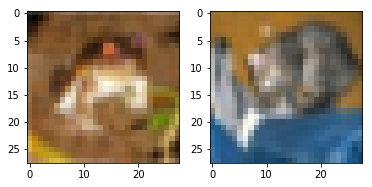

In [4]:
list1=[]
for i in range (50000):
    img1= X_train[i]
    img_fin1 = cv2.resize(img1, (28, 28))
    list1.append(img_fin1)
list2=[]
for i in range (10000):
    img2= X_val[i]
    img_fin2 = cv2.resize(img2, (28, 28))
    list2.append(img_fin2)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(list1[0].reshape(28, 28, 3));
ax2.imshow(list2[0].reshape(28, 28, 3));

In [5]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train1= np.array(list1).reshape(X_train.shape[0], 28, 28, 3)
X_val1= np.array(list2).reshape(X_val.shape[0], 28, 28,3)

from matplotlib import pyplot as plt
%matplotlib inline


model28 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(28,28,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

model28.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model28.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        1792      
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       73856     
__________

In [6]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    hist28 = model28.fit(X_train1, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val1, y_val),
          callbacks=[early_stop, tensorboard])
va28=hist28.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 31s 618us/step - loss: 1.8576 - acc: 0.3052 - val_loss: 1.7391 - val_acc: 0.3278
Epoch 2/20
50000/50000 [==============================] - 33s 651us/step - loss: 1.4329 - acc: 0.4692 - val_loss: 1.7717 - val_acc: 0.3606
Epoch 3/20
50000/50000 [==============================] - 32s 647us/step - loss: 1.2486 - acc: 0.5448 - val_loss: 1.4839 - val_acc: 0.4529
Epoch 4/20
50000/50000 [==============================] - 35s 707us/step - loss: 1.1089 - acc: 0.6016 - val_loss: 1.2994 - val_acc: 0.5325
Epoch 5/20
50000/50000 [==============================] - 38s 765us/step - loss: 0.9980 - acc: 0.6418 - val_loss: 1.1809 - val_acc: 0.5889
Epoch 6/20
50000/50000 [==============================] - 33s 668us/step - loss: 0.9063 - acc: 0.6794 - val_loss: 1.0124 - val_acc: 0.6498
Epoch 7/20
50000/50000 [==============================] - 32s 647us/step - loss: 0.8210 - acc: 0.7100 - val_loss: 0.

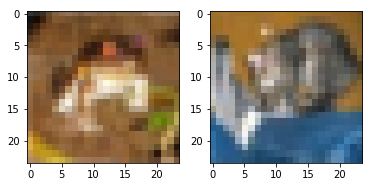

In [7]:
list3=[]
for i in range (50000):
    img3= X_train[i]
    img_fin3 = cv2.resize(img3, (24, 24))
    list3.append(img_fin3)
list4=[]
for i in range (10000):
    img4= X_val[i]
    img_fin4 = cv2.resize(img4, (24, 24))
    list4.append(img_fin4)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(list3[0].reshape(24, 24, 3));
ax2.imshow(list4[0].reshape(24, 24, 3));

In [8]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train2 = np.array(list3).reshape(X_train.shape[0], 24, 24, 3)
X_val2 = np.array(list4).reshape(X_val.shape[0], 24, 24,3)

from matplotlib import pyplot as plt
%matplotlib inline


model24 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(24,24,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

model24.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model24.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 64)        1792      
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_21 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 128)       73856     
__________

In [9]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    hist24 = model24.fit(X_train2, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val2, y_val),
          callbacks=[early_stop, tensorboard])
va24=hist24.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 29s 573us/step - loss: 1.8901 - acc: 0.2779 - val_loss: 1.9928 - val_acc: 0.3008
Epoch 2/20
50000/50000 [==============================] - 31s 612us/step - loss: 1.4820 - acc: 0.4441 - val_loss: 1.5260 - val_acc: 0.4511
Epoch 3/20
50000/50000 [==============================] - 30s 601us/step - loss: 1.2912 - acc: 0.5284 - val_loss: 1.3614 - val_acc: 0.5131
Epoch 4/20
50000/50000 [==============================] - 30s 598us/step - loss: 1.1624 - acc: 0.5797 - val_loss: 1.1309 - val_acc: 0.5958
Epoch 5/20
50000/50000 [==============================] - 29s 585us/step - loss: 1.0507 - acc: 0.6235 - val_loss: 1.1875 - val_acc: 0.5912
Epoch 6/20
50000/50000 [==============================] - 28s 557us/step - loss: 0.9606 - acc: 0.6592 - val_loss: 1.0049 - val_acc: 0.6588
Epoch 7/20
50000/50000 [==============================] - 27s 534us/step - loss: 0.8870 - acc: 0.6882 - val_loss: 0.

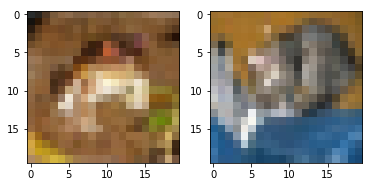

In [10]:
list5=[]
for i in range (50000):
    img5= X_train[i]
    img_fin5 = cv2.resize(img5, (20, 20))
    list5.append(img_fin5)
list6=[]
for i in range (10000):
    img6= X_val[i]
    img_fin6 = cv2.resize(img6, (20, 20))
    list6.append(img_fin6)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(list5[0].reshape(20, 20, 3));
ax2.imshow(list6[0].reshape(20, 20, 3));

In [11]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train3 = np.array(list5).reshape(X_train.shape[0], 20, 20, 3)
X_val3 = np.array(list6).reshape(X_val.shape[0], 20, 20,3)

from matplotlib import pyplot as plt
%matplotlib inline


model20 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(20,20,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

model20.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model20.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 20, 20, 64)        1792      
_________________________________________________________________
batch_normalization_30 (Batc (None, 20, 20, 64)        256       
_________________________________________________________________
dropout_21 (Dropout)         (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 20, 64)        36928     
_________________________________________________________________
batch_normalization_31 (Batc (None, 20, 20, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 10, 10, 128)       73856     
__________

In [12]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    hist20 = model20.fit(X_train3, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val3, y_val),
          callbacks=[early_stop, tensorboard])
va20=hist20.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 27s 544us/step - loss: 1.8913 - acc: 0.2803 - val_loss: 1.7675 - val_acc: 0.3354
Epoch 2/20
50000/50000 [==============================] - 29s 580us/step - loss: 1.5401 - acc: 0.4213 - val_loss: 1.4936 - val_acc: 0.4358
Epoch 3/20
50000/50000 [==============================] - 29s 584us/step - loss: 1.3727 - acc: 0.4937 - val_loss: 1.3811 - val_acc: 0.4990
Epoch 4/20
50000/50000 [==============================] - 29s 581us/step - loss: 1.2399 - acc: 0.5522 - val_loss: 1.2564 - val_acc: 0.5605
Epoch 5/20
50000/50000 [==============================] - 28s 569us/step - loss: 1.1337 - acc: 0.5933 - val_loss: 1.1970 - val_acc: 0.5849
Epoch 6/20
50000/50000 [==============================] - 27s 547us/step - loss: 1.0498 - acc: 0.6255 - val_loss: 1.0343 - val_acc: 0.6451
Epoch 7/20
50000/50000 [==============================] - 26s 515us/step - loss: 0.9788 - acc: 0.6518 - val_loss: 1.

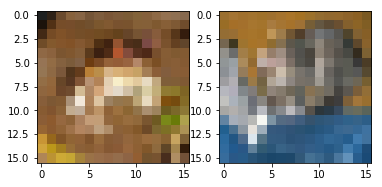

In [15]:
list7=[]
for i in range (50000):
    img7= X_train[i]
    img_fin7 = cv2.resize(img7, (16, 16))
    list7.append(img_fin7)
list8=[]
for i in range (10000):
    img8= X_val[i]
    img_fin8 = cv2.resize(img8, (16, 16))
    list8.append(img_fin8)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(list7[0].reshape(16, 16, 3));
ax2.imshow(list8[0].reshape(16, 16, 3));

In [16]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train4 = np.array(list7).reshape(X_train.shape[0], 16, 16, 3)
X_val4 = np.array(list8).reshape(X_val.shape[0], 16, 16,3)

from matplotlib import pyplot as plt
%matplotlib inline


model16 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(16,16,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

model16.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 16, 16, 64)        1792      
_________________________________________________________________
batch_normalization_50 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
dropout_35 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_51 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [17]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    hist16 = model16.fit(X_train4, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val4, y_val),
          callbacks=[early_stop, tensorboard])
va16=hist16.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 460us/step - loss: 1.9691 - acc: 0.2427 - val_loss: 1.8309 - val_acc: 0.3186
Epoch 2/20
50000/50000 [==============================] - 24s 471us/step - loss: 1.6056 - acc: 0.3908 - val_loss: 1.6101 - val_acc: 0.4210
Epoch 3/20
50000/50000 [==============================] - 25s 495us/step - loss: 1.4580 - acc: 0.4601 - val_loss: 1.4059 - val_acc: 0.4851
Epoch 4/20
50000/50000 [==============================] - 25s 510us/step - loss: 1.3353 - acc: 0.5137 - val_loss: 1.2766 - val_acc: 0.5467
Epoch 5/20
50000/50000 [==============================] - 26s 516us/step - loss: 1.2467 - acc: 0.5504 - val_loss: 1.2403 - val_acc: 0.5631
Epoch 6/20
50000/50000 [==============================] - 25s 504us/step - loss: 1.1727 - acc: 0.5799 - val_loss: 1.2852 - val_acc: 0.5702
Epoch 7/20
50000/50000 [==============================] - 24s 474us/step - loss: 1.1077 - acc: 0.6061 - val_loss: 1.

Text(0, 0.5, 'Validation Accuracy')

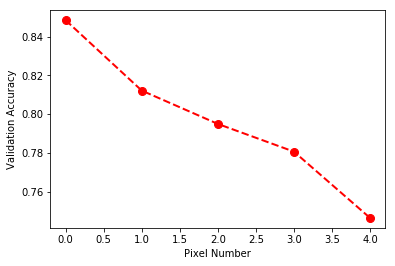

In [66]:
plt.plot([va32,va28,va24,va20,va16],color='red',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('Pixel Number')
plt.ylabel('Validation Accuracy')

## Out of Focus


In [23]:
from scipy.ndimage import gaussian_filter as gf

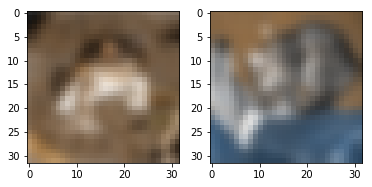

In [35]:
focus1=[]
for i in range (50000):
    f1= X_train[i]
    f1 = gf(f1, sigma=1)
    focus1.append(f1)
focus2=[]
for i in range (10000):
    f2= X_val[i]
    f2 = gf(f2, sigma=1)
    focus2.append(f2)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(focus1[0].reshape(32, 32, 3));
ax2.imshow(focus2[0].reshape(32, 32, 3));

In [36]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train5 = np.array(focus1).reshape(X_train.shape[0], 32, 32, 3)
X_val5 = np.array(focus2).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelf1 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelf1.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelf1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_60 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_42 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_61 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 128)       73856     
__________

In [37]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histf1 = modelf1.fit(X_train5, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val5, y_val),
          callbacks=[early_stop, tensorboard])
vaf1=histf1.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 674us/step - loss: 1.8499 - acc: 0.3110 - val_loss: 1.8420 - val_acc: 0.3202
Epoch 2/20
50000/50000 [==============================] - 36s 718us/step - loss: 1.4754 - acc: 0.4566 - val_loss: 1.6582 - val_acc: 0.4125
Epoch 3/20
50000/50000 [==============================] - 36s 719us/step - loss: 1.3224 - acc: 0.5182 - val_loss: 1.4319 - val_acc: 0.4871
Epoch 4/20
50000/50000 [==============================] - 35s 697us/step - loss: 1.1906 - acc: 0.5702 - val_loss: 1.4401 - val_acc: 0.4842
Epoch 5/20
50000/50000 [==============================] - 35s 697us/step - loss: 1.0831 - acc: 0.6125 - val_loss: 1.3055 - val_acc: 0.5403
Epoch 6/20
50000/50000 [==============================] - 34s 675us/step - loss: 0.9983 - acc: 0.6441 - val_loss: 1.1258 - val_acc: 0.6038
Epoch 7/20
50000/50000 [==============================] - 33s 661us/step - loss: 0.9203 - acc: 0.6754 - val_loss: 1.

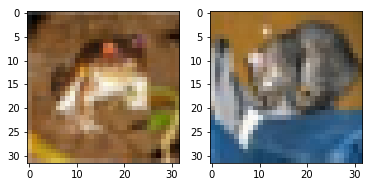

In [48]:
focus3=[]
for i in range (50000):
    f3= X_train[i]
    f3 = gf(f3, sigma=0.2)
    focus3.append(f3)
focus4=[]
for i in range (10000):
    f4= X_val[i]
    f4 = gf(f4, sigma=0.2)
    focus4.append(f4)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(focus3[0].reshape(32, 32, 3));
ax2.imshow(focus4[0].reshape(32, 32, 3));

In [50]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train6 = np.array(focus3).reshape(X_train.shape[0], 32, 32, 3)
X_val6 = np.array(focus4).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelf02 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelf02.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelf02.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_70 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_49 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_71 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 16, 16, 128)       73856     
__________

In [51]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histf02 = modelf02.fit(X_train6, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val6, y_val),
          callbacks=[early_stop, tensorboard])
vaf02=histf02.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 35s 700us/step - loss: 1.8385 - acc: 0.3112 - val_loss: 1.6273 - val_acc: 0.4036
Epoch 2/20
50000/50000 [==============================] - 36s 729us/step - loss: 1.3832 - acc: 0.4891 - val_loss: 1.3518 - val_acc: 0.5120
Epoch 3/20
50000/50000 [==============================] - 36s 726us/step - loss: 1.1741 - acc: 0.5741 - val_loss: 1.1332 - val_acc: 0.6004
Epoch 4/20
50000/50000 [==============================] - 36s 717us/step - loss: 1.0256 - acc: 0.6333 - val_loss: 1.0655 - val_acc: 0.6203
Epoch 5/20
50000/50000 [==============================] - 35s 700us/step - loss: 0.9024 - acc: 0.6788 - val_loss: 0.9712 - val_acc: 0.6638
Epoch 6/20
50000/50000 [==============================] - 34s 681us/step - loss: 0.8157 - acc: 0.7128 - val_loss: 0.8114 - val_acc: 0.7210
Epoch 7/20
50000/50000 [==============================] - 33s 667us/step - loss: 0.7498 - acc: 0.7386 - val_loss: 0.

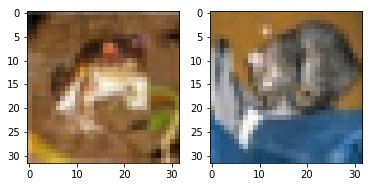

In [68]:
focus5=[]
for i in range (50000):
    f5= X_train[i]
    f5 = gf(f5, sigma=0.4)
    focus5.append(f5)
focus6=[]
for i in range (10000):
    f6= X_val[i]
    f6 = gf(f6, sigma=0.4)
    focus6.append(f6)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(focus5[0].reshape(32, 32, 3));
ax2.imshow(focus6[0].reshape(32, 32, 3));

In [55]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train7 = np.array(focus5).reshape(X_train.shape[0], 32, 32, 3)
X_val7 = np.array(focus6).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelf04 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelf04.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelf04.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_90 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_63 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_91 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 16, 16, 128)       73856     
__________

In [56]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histf04 = modelf04.fit(X_train7, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val7, y_val),
          callbacks=[early_stop, tensorboard])
vaf04=histf04.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 36s 728us/step - loss: 1.8224 - acc: 0.3131 - val_loss: 1.8362 - val_acc: 0.3395
Epoch 2/20
50000/50000 [==============================] - 37s 740us/step - loss: 1.3988 - acc: 0.4816 - val_loss: 1.4274 - val_acc: 0.4690
Epoch 3/20
50000/50000 [==============================] - 36s 727us/step - loss: 1.1983 - acc: 0.5650 - val_loss: 1.3737 - val_acc: 0.4954
Epoch 4/20
50000/50000 [==============================] - 35s 709us/step - loss: 1.0526 - acc: 0.6227 - val_loss: 1.1343 - val_acc: 0.5953
Epoch 5/20
50000/50000 [==============================] - 35s 691us/step - loss: 0.9418 - acc: 0.6640 - val_loss: 0.9809 - val_acc: 0.6540
Epoch 6/20
50000/50000 [==============================] - 33s 668us/step - loss: 0.8498 - acc: 0.6988 - val_loss: 0.9260 - val_acc: 0.6903
Epoch 7/20
50000/50000 [==============================] - 32s 648us/step - loss: 0.7670 - acc: 0.7306 - val_loss: 0.

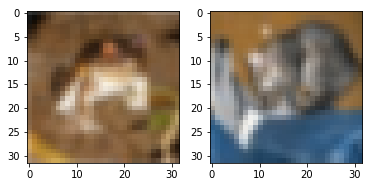

In [69]:
focus7=[]
for i in range (50000):
    f7= X_train[i]
    f7 = gf(f7, sigma=0.6)
    focus7.append(f7)
focus8=[]
for i in range (10000):
    f8= X_val[i]
    f8 = gf(f8, sigma=0.6)
    focus8.append(f8)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(focus7[0].reshape(32, 32, 3));
ax2.imshow(focus8[0].reshape(32, 32, 3));

In [58]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train8 = np.array(focus7).reshape(X_train.shape[0], 32, 32, 3)
X_val8= np.array(focus8).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelf06 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelf06.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelf06.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_100 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_70 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_101 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 16, 16, 128)       73856     
__________

In [59]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histf06 = modelf06.fit(X_train8, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val8, y_val),
          callbacks=[early_stop, tensorboard])
vaf06=histf06.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 35s 703us/step - loss: 1.8331 - acc: 0.3136 - val_loss: 1.7387 - val_acc: 0.3635
Epoch 2/20
50000/50000 [==============================] - 37s 747us/step - loss: 1.4372 - acc: 0.4683 - val_loss: 1.4818 - val_acc: 0.4682
Epoch 3/20
50000/50000 [==============================] - 36s 725us/step - loss: 1.2426 - acc: 0.5495 - val_loss: 1.2219 - val_acc: 0.5590
Epoch 4/20
50000/50000 [==============================] - 35s 705us/step - loss: 1.0961 - acc: 0.6060 - val_loss: 1.0900 - val_acc: 0.6101
Epoch 5/20
50000/50000 [==============================] - 35s 706us/step - loss: 0.9796 - acc: 0.6502 - val_loss: 1.0415 - val_acc: 0.6340
Epoch 6/20
50000/50000 [==============================] - 34s 674us/step - loss: 0.8811 - acc: 0.6882 - val_loss: 0.9683 - val_acc: 0.6700
Epoch 7/20
50000/50000 [==============================] - 34s 672us/step - loss: 0.8005 - acc: 0.7201 - val_loss: 0.

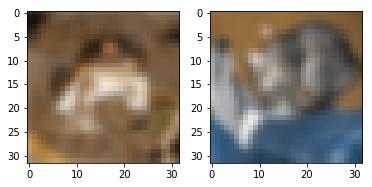

In [60]:
focus9=[]
for i in range (50000):
    f9= X_train[i]
    f9 = gf(f9, sigma=0.8)
    focus9.append(f9)
focus10=[]
for i in range (10000):
    f10= X_val[i]
    f10 = gf(f10, sigma=0.8)
    focus10.append(f10)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(focus9[0].reshape(32, 32, 3));
ax2.imshow(focus10[0].reshape(32, 32, 3));

In [61]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train9 = np.array(focus9).reshape(X_train.shape[0], 32, 32, 3)
X_val9= np.array(focus10).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelf08 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelf08.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelf08.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_110 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_77 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_111 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 16, 16, 128)       73856     
__________

In [62]:
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histf08 = modelf08.fit(X_train9, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val9, y_val),
          callbacks=[early_stop, tensorboard])
vaf08=histf08.history['val_acc'][-1]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 38s 761us/step - loss: 1.8271 - acc: 0.3168 - val_loss: 1.7481 - val_acc: 0.3432
Epoch 2/20
50000/50000 [==============================] - 38s 756us/step - loss: 1.4600 - acc: 0.4602 - val_loss: 1.5806 - val_acc: 0.4220
Epoch 3/20
50000/50000 [==============================] - 37s 741us/step - loss: 1.2894 - acc: 0.5329 - val_loss: 1.4742 - val_acc: 0.4587
Epoch 4/20
50000/50000 [==============================] - 37s 738us/step - loss: 1.1466 - acc: 0.5899 - val_loss: 1.2766 - val_acc: 0.5471
Epoch 5/20
50000/50000 [==============================] - 36s 724us/step - loss: 1.0323 - acc: 0.6318 - val_loss: 1.2964 - val_acc: 0.5388
Epoch 6/20
50000/50000 [==============================] - 35s 699us/step - loss: 0.9357 - acc: 0.6680 - val_loss: 1.0442 - val_acc: 0.6327
Epoch 7/20
50000/50000 [==============================] - 34s 681us/step - loss: 0.8539 - acc: 0.6993 - val_loss: 1.

Text(0, 0.5, 'Validation Accuracy')

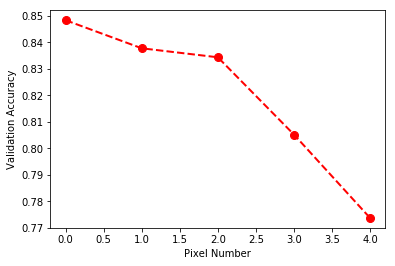

In [67]:
plt.plot([va32,vaf02,vaf04,vaf06,vaf08],color='red',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('Out of focus')
plt.ylabel('Validation Accuracy')

## Noise


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


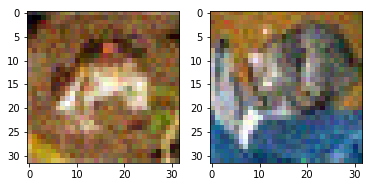

In [51]:
noise005 = np.random.normal(0,0.05,3072) 
noise005 = noise005.reshape(32,32,3)
gn051=[]
for i in range (50000):
    gn1= X_train[i]/255
    gn1 = gn1 + noise005
    gn051.append(gn1)
gn052=[]
for i in range (10000):
    gn2= X_val[i]/255
    gn2 = gn2 + noise005
    gn052.append(gn2)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gn051[0].reshape(32, 32, 3));
ax2.imshow(gn052[0].reshape(32, 32, 3));

In [54]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train10 = np.array(gn051).reshape(X_train.shape[0], 32, 32, 3)
X_val10= np.array(gn052).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelgn05 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelgn05.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelgn05.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histgn05 = modelgn05.fit(X_train10, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val10, y_val),
          callbacks=[early_stop, tensorboard])
vagn05=histgn05.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 128)       73856     
__________

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


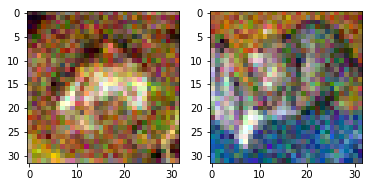

In [55]:
noise010 = np.random.normal(0,0.1,3072) 
noise010 = noise010.reshape(32,32,3)
gn101=[]
for i in range (50000):
    gn3= X_train[i]/255
    gn3 = gn3 + noise010
    gn101.append(gn3)
gn102=[]
for i in range (10000):
    gn4= X_val[i]/255
    gn4 = gn4 + noise010
    gn102.append(gn4)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gn101[0].reshape(32, 32, 3));
ax2.imshow(gn102[0].reshape(32, 32, 3));

In [56]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train11 = np.array(gn101).reshape(X_train.shape[0], 32, 32, 3)
X_val11= np.array(gn102).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelgn10 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelgn10.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelgn10.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histgn10 = modelgn10.fit(X_train11, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val11, y_val),
          callbacks=[early_stop, tensorboard])
vagn10=histgn10.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 128)       73856     
__________

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


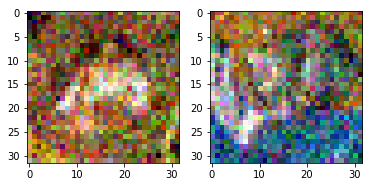

In [57]:
noise015 = np.random.normal(0,0.15,3072) 
noise015 = noise015.reshape(32,32,3)
gn151=[]
for i in range (50000):
    gn5= X_train[i]/255
    gn5 = gn5 + noise015
    gn151.append(gn5)
gn152=[]
for i in range (10000):
    gn6= X_val[i]/255
    gn6 = gn6 + noise015
    gn152.append(gn6)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gn151[0].reshape(32, 32, 3));
ax2.imshow(gn152[0].reshape(32, 32, 3));

In [64]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train12 = np.array(gn151).reshape(X_train.shape[0], 32, 32, 3)
X_val12= np.array(gn152).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelgn15 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelgn15.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelgn15.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histgn15 = modelgn15.fit(X_train12, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val12, y_val),
          callbacks=[early_stop, tensorboard])
vagn15=histgn15.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_80 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_56 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_81 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 16, 16, 128)       73856     
__________

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


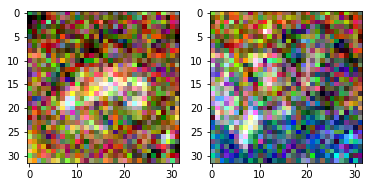

In [59]:
noise020 = np.random.normal(0,0.2,3072) 
noise020 = noise020.reshape(32,32,3)
gn201=[]
for i in range (50000):
    gn7= X_train[i]/255
    gn7 = gn7 + noise020
    gn201.append(gn7)
gn202=[]
for i in range (10000):
    gn8= X_val[i]/255
    gn8 = gn8 + noise020
    gn202.append(gn8)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gn201[0].reshape(32, 32, 3));
ax2.imshow(gn202[0].reshape(32, 32, 3));

In [81]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train13 = np.array(gn151).reshape(X_train.shape[0], 32, 32, 3)
X_val13= np.array(gn152).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelgn20 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelgn20.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelgn20.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histgn20 = modelgn20.fit(X_train13, y_train,
          batch_size=64,
          epochs=20,
          verbose=1,
          validation_data=(X_val13, y_val),
          callbacks=[early_stop, tensorboard])
vagn20=histgn20.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_110 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_77 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_111 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 16, 16, 128)       73856     
__________

50000/50000 [==============================] - 34s 681us/step - loss: 0.4873 - acc: 0.8272 - val_loss: 0.7128 - val_acc: 0.7618
Epoch 20/20
50000/50000 [==============================] - 31s 629us/step - loss: 0.4627 - acc: 0.8380 - val_loss: 0.7012 - val_acc: 0.7624


In [82]:
vagn05=max(histgn05.history['val_acc'])
vagn05

0.81930000000000003

In [83]:
vagn10=max(histgn10.history['val_acc'])
vagn10

0.77200000000000002

In [84]:
vagn15=max(histgn15.history['val_acc'])
vagn15

0.76780000000000004

In [85]:
vagn20=max(histgn20.history['val_acc'])
vagn20

0.76239999999999997

Text(0, 0.5, 'Validation Accuracy')

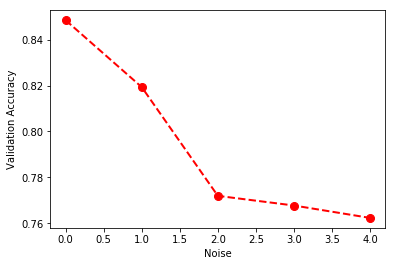

In [86]:
plt.plot([0.8484,vagn05,vagn10,vagn15,vagn20],color='red',marker='o', linestyle='dashed',linewidth=2, markersize=8)
plt.xlabel('Noise')
plt.ylabel('Validation Accuracy')

## Color Filter

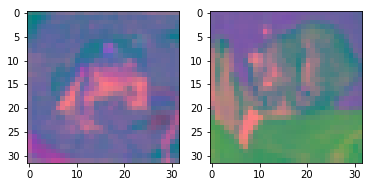

In [11]:
yuv1=[]
for i in range (50000):
    cf1=  cv2.cvtColor(X_train[i], cv2.COLOR_RGB2YUV)
    yuv1.append(cf1)
yuv2=[]
for i in range (10000):
    cf2= cv2.cvtColor(X_val[i], cv2.COLOR_RGB2YUV)
    yuv2.append(cf2)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(yuv1[0].reshape(32, 32, 3));
ax2.imshow(yuv2[0].reshape(32, 32, 3));

In [12]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train14 = np.array(yuv1).reshape(X_train.shape[0], 32, 32, 3)
X_val14= np.array(yuv2).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelyuv = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelyuv.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelyuv.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histyuv = modelyuv.fit(X_train14, y_train,
          batch_size=64,
          epochs=25,
          verbose=1,
          validation_data=(X_val14, y_val),
          callbacks=[early_stop, tensorboard])
vayuv=histyuv.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 128)       73856     
__________

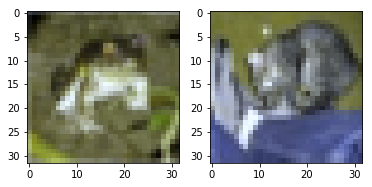

In [21]:
xyz1=[]
for i in range (50000):
    cf5=  cv2.cvtColor(X_train[i], cv2.COLOR_RGB2XYZ)
    xyz1.append(cf5)
xyz2=[]
for i in range (10000):
    cf6= cv2.cvtColor(X_val[i], cv2.COLOR_RGB2XYZ)
    xyz2.append(cf6)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(xyz1[0].reshape(32, 32, 3));
ax2.imshow(xyz2[0].reshape(32, 32, 3));

In [22]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train15 = np.array(xyz1).reshape(X_train.shape[0], 32, 32, 3)
X_val15= np.array(xyz2).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelxyz = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelxyz.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelxyz.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histxyz = modelxyz.fit(X_train15, y_train,
          batch_size=64,
          epochs=25,
          verbose=1,
          validation_data=(X_val15, y_val),
          callbacks=[early_stop, tensorboard])
vaxyz=histxyz.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_72 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_50 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_73 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 16, 16, 128)       73856     
__________

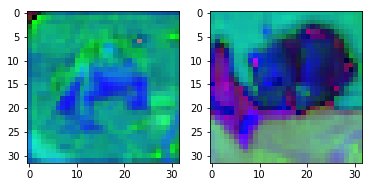

In [23]:
hsv1=[]
for i in range (50000):
    cf7=  cv2.cvtColor(X_train[i], cv2.COLOR_RGB2HSV)
    hsv1.append(cf7)
hsv2=[]
for i in range (10000):
    cf8= cv2.cvtColor(X_val[i], cv2.COLOR_RGB2HSV)
    hsv2.append(cf8)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(hsv1[0].reshape(32, 32, 3));
ax2.imshow(hsv2[0].reshape(32, 32, 3));

In [24]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train16 = np.array(hsv1).reshape(X_train.shape[0], 32, 32, 3)
X_val16= np.array(hsv2).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelhsv = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelhsv.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelhsv.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histhsv = modelhsv.fit(X_train16, y_train,
          batch_size=64,
          epochs=25,
          verbose=1,
          validation_data=(X_val16, y_val),
          callbacks=[early_stop, tensorboard])
vahsv=histhsv.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_82 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_57 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_83 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 16, 16, 128)       73856     
__________

Epoch 22/25
50000/50000 [==============================] - 30s 601us/step - loss: 0.3166 - acc: 0.8900 - val_loss: 0.4942 - val_acc: 0.8424
Epoch 23/25
50000/50000 [==============================] - 30s 600us/step - loss: 0.2949 - acc: 0.8947 - val_loss: 0.4879 - val_acc: 0.8411
Epoch 24/25
50000/50000 [==============================] - 30s 600us/step - loss: 0.2829 - acc: 0.9001 - val_loss: 0.4983 - val_acc: 0.8408
Epoch 25/25
50000/50000 [==============================] - 30s 604us/step - loss: 0.2664 - acc: 0.9076 - val_loss: 0.4951 - val_acc: 0.8393


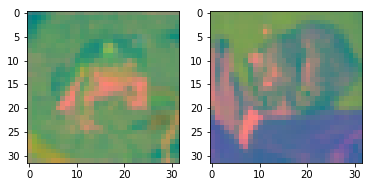

In [25]:
ycrcb1=[]
for i in range (50000):
    cf9=  cv2.cvtColor(X_train[i], cv2.COLOR_RGB2YCrCb)
    ycrcb1.append(cf9)
ycrcb2=[]
for i in range (10000):
    cf10= cv2.cvtColor(X_val[i], cv2.COLOR_RGB2YCrCb)
    ycrcb2.append(cf10)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ycrcb1[0].reshape(32, 32, 3));
ax2.imshow(ycrcb2[0].reshape(32, 32, 3));

In [26]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train17 = np.array(ycrcb1).reshape(X_train.shape[0], 32, 32, 3)
X_val17= np.array(ycrcb2).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelycrcb = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelycrcb.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelycrcb.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histycrcb = modelycrcb.fit(X_train17, y_train,
          batch_size=64,
          epochs=25,
          verbose=1,
          validation_data=(X_val17, y_val),
          callbacks=[early_stop, tensorboard])
vaycrcb=histycrcb.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_92 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_64 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_93 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 16, 16, 128)       73856     
__________

## Contrast Filter


C:\Users\Yihang Xin\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


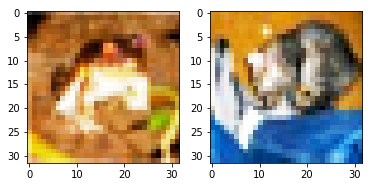

In [3]:
equa1=[]
for i in range (50000):
    con1=  exposure.equalize_hist(X_train[i])
    equa1.append(con1)
equa2=[]
for i in range (10000):
    con2= exposure.equalize_hist(X_val[i])
    equa2.append(con2)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(equa1[0].reshape(32, 32, 3));
ax2.imshow(equa2[0].reshape(32, 32, 3));

In [4]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train18 = np.array(equa1).reshape(X_train.shape[0], 32, 32, 3)
X_val18= np.array(equa2).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelequa1 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelequa1.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelequa1.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histequa1 = modelequa1.fit(X_train18, y_train,
          batch_size=64,
          epochs=25,
          verbose=1,
          validation_data=(X_val18, y_val),
          callbacks=[early_stop, tensorboard])
vaequa=histequa1.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 128)       73856     
__________

Epoch 22/25
50000/50000 [==============================] - 31s 624us/step - loss: 0.3148 - acc: 0.8889 - val_loss: 0.5357 - val_acc: 0.8227
Epoch 23/25
50000/50000 [==============================] - 31s 624us/step - loss: 0.2964 - acc: 0.8961 - val_loss: 0.5920 - val_acc: 0.8123
Epoch 24/25
50000/50000 [==============================] - 31s 623us/step - loss: 0.2807 - acc: 0.9013 - val_loss: 0.5365 - val_acc: 0.8225
Epoch 25/25
50000/50000 [==============================] - 31s 620us/step - loss: 0.2702 - acc: 0.9042 - val_loss: 0.5119 - val_acc: 0.8345


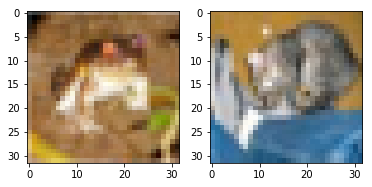

In [5]:
corrected1=[]
for i in range (50000):
    con3=  exposure.adjust_log(X_train[i], 1)
    corrected1.append(con3)
corrected2=[]
for i in range (10000):
    con4= exposure.adjust_log(X_val[i], 1)
    corrected2.append(con4)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(corrected1[0].reshape(32, 32, 3));
ax2.imshow(corrected2[0].reshape(32, 32, 3));

In [6]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train19 = np.array(corrected1).reshape(X_train.shape[0], 32, 32, 3)
X_val19= np.array(corrected2).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelcor = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelcor.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelcor.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histcor = modelcor.fit(X_train19, y_train,
          batch_size=64,
          epochs=25,
          verbose=1,
          validation_data=(X_val19, y_val),
          callbacks=[early_stop, tensorboard])
vacor=histcor.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 128)       73856     
__________

Epoch 22/25
50000/50000 [==============================] - 31s 614us/step - loss: 0.2777 - acc: 0.9021 - val_loss: 0.4852 - val_acc: 0.8460
Epoch 23/25
50000/50000 [==============================] - 31s 612us/step - loss: 0.2616 - acc: 0.9085 - val_loss: 0.4950 - val_acc: 0.8445
Epoch 24/25
50000/50000 [==============================] - 31s 612us/step - loss: 0.2504 - acc: 0.9108 - val_loss: 0.5072 - val_acc: 0.8407
Epoch 25/25
50000/50000 [==============================] - 31s 612us/step - loss: 0.2409 - acc: 0.9143 - val_loss: 0.4831 - val_acc: 0.8491


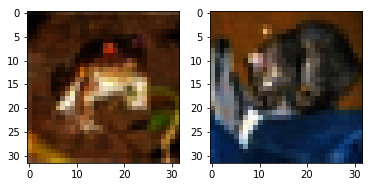

In [7]:
gamma1=[]
for i in range (50000):
    con5=  exposure.adjust_gamma(X_train[i], 2)
    gamma1.append(con5)
gamma2=[]
for i in range (10000):
    con6= exposure.adjust_gamma(X_val[i], 2)
    gamma2.append(con6)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gamma1[0].reshape(32, 32, 3));
ax2.imshow(gamma2[0].reshape(32, 32, 3));

In [8]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train20 = np.array(gamma1).reshape(X_train.shape[0], 32, 32, 3)
X_val20= np.array(gamma2).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelgamma = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelgamma.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelgamma.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histgamma = modelgamma.fit(X_train20, y_train,
          batch_size=64,
          epochs=25,
          verbose=1,
          validation_data=(X_val20, y_val),
          callbacks=[early_stop, tensorboard])
vagamma=histgamma.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 128)       73856     
__________

Epoch 22/25
50000/50000 [==============================] - 31s 614us/step - loss: 0.3046 - acc: 0.8926 - val_loss: 0.5458 - val_acc: 0.8266


C:\Users\Yihang Xin\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:351: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


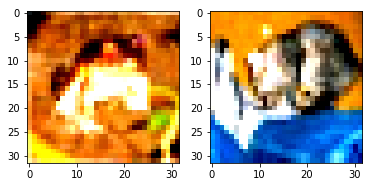

In [9]:
strench1=[]
for i in range (50000):
    p20, p80 = np.percentile(X_train[i], (20, 80))
    con7=  exposure.rescale_intensity(X_train[i], in_range=(p20, p80))
    strench1.append(con7)
strench2=[]
for i in range (10000):
    p20, p80 = np.percentile(X_val[i], (20, 80))
    con8=  exposure.rescale_intensity(X_val[i], in_range=(p20, p80))
    strench2.append(con8)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(strench1[0].reshape(32, 32, 3));
ax2.imshow(strench2[0].reshape(32, 32, 3));

In [10]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train21 = np.array(strench1).reshape(X_train.shape[0], 32, 32, 3)
X_val21= np.array(strench2).reshape(X_val.shape[0], 32, 32,3)

from matplotlib import pyplot as plt
%matplotlib inline


modelstrench = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
   
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
    
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(padding='same'),
    
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.MaxPool2D(padding='same'),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.MaxPool2D(padding='same'),
      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dense(1000, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

modelstrench.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

modelstrench.summary()
with tf.device('/device:GPU:0'):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3)
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format('model_name'))

    histstrench = modelstrench.fit(X_train21, y_train,
          batch_size=64,
          epochs=25,
          verbose=1,
          validation_data=(X_val21, y_val),
          callbacks=[early_stop, tensorboard])
vastrench=histstrench.history['val_acc'][-1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 128)       73856     
__________

50000/50000 [==============================] - 32s 630us/step - loss: 0.3625 - acc: 0.8719 - val_loss: 0.5792 - val_acc: 0.8131
Epoch 22/25
50000/50000 [==============================] - 30s 610us/step - loss: 0.3433 - acc: 0.8804 - val_loss: 0.5894 - val_acc: 0.8092
Epoch 23/25
50000/50000 [==============================] - 30s 608us/step - loss: 0.3290 - acc: 0.8843 - val_loss: 0.5846 - val_acc: 0.8065
